# Polynomial Regression

## The graph of averages 
Recall the graph of averages from the Simple Regression notebook.

In [1]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


In [2]:
HW=pd.read_csv('../data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


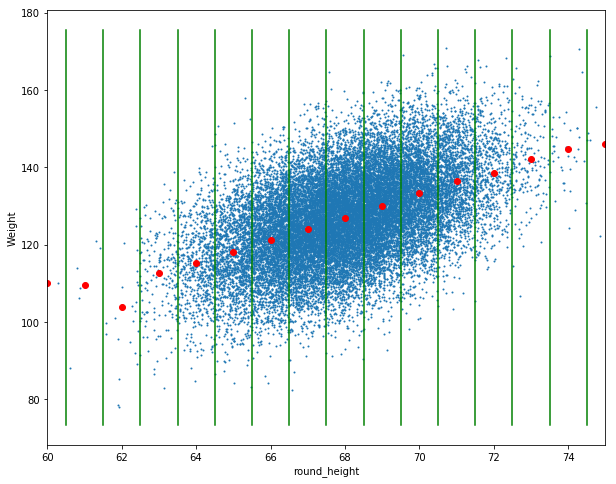

In [25]:
def Average_Plot(Y):
    # calculate the mean weight for each 1-inch interval of height.
    HW['round_height']=HW['Height'].round()

    per_height_means=HW.groupby('round_height').mean()[[Y]]

    ax=HW.plot(kind='scatter',s=1,x='Height',y=Y,figsize=[10,8]);
    per_height_means.plot(y=Y,style='ro',ax=ax,legend=False)

    _xlim=xlim()
    _ylim=ylim()
    for _x in arange(_xlim[0]+0.5,_xlim[1],1):
        ax.plot([_x,_x],[_ylim[0],_ylim[1]],'g')
    return ax
Average_Plot('Weight');
#x0,x1=xlim()
#ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

Even without finding the least squares solution it is clear that a straight line would pass very close to most of the average points. This indicates that linear regression is sufficient for this case.

Suppose we have data for which the averages do not fall close to a straight line.

In [11]:
HW['P2']=HW['Weight']+(HW['Height']-68)**2

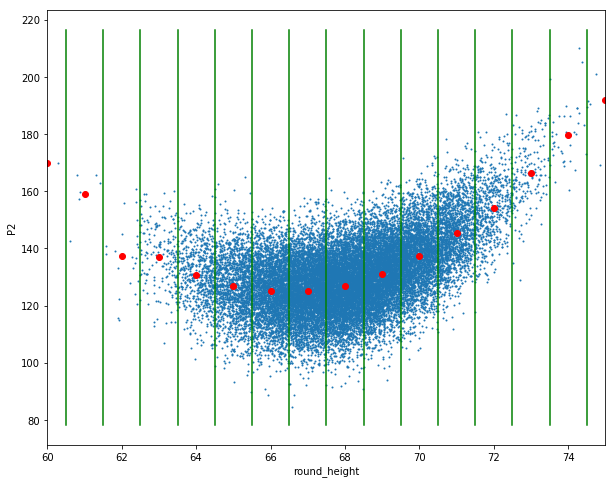

In [12]:
Average_Plot('P2')

In [32]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A,A**2])
y=np.array(HW['P2'])
A.shape,y.shape

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w2

array([  4.57718628e+03,  -1.33969361e+02,   1.00774285e+00])

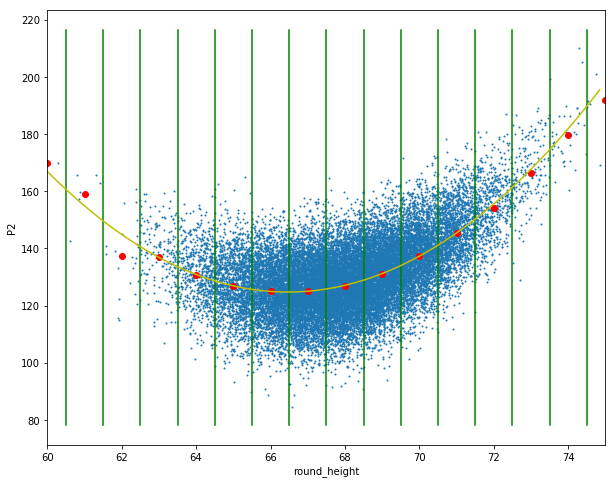

In [34]:
ax=Average_Plot('P2')
_xmin,_xmax=xlim()
_xrange=_xmax-_xmin
X=arange(_xmin,_xmax,_xrange/100.)
Y=w2[0]+w2[1]*X+w2[2]*(X**2)
ax.plot(X,Y,'y')

In [15]:
A[:,:4]

array([[  1.     ,   1.     ,   1.     ,   1.     ],
       [ 65.78331,  71.51521,  69.39874,  68.2166 ]])